#   Bessel Processes

The purpose of this notebook is to provide an illustration of the [Bessel Processes](https://en.wikipedia.org/wiki/Bessel_process) and some of its main properties. 


## Integer Case

Let $W_t = (W^1_t, \cdots, W^n_t)$ be a n-dimensional Browanian Motion for some integer $n \geq 2$. The Bessel process of dimension $n$ is defined as follows 

\begin{equation}
X_t = \|W_t\|, \quad t \geq 0,
\end{equation}
where $\| \ \   \| $ denotes the Euclidean norm in $\mathbb{R}^n$. That is, 

\begin{equation}
X_t = \sqrt{\sum_{i=1}^n (W^i_t)^2}.
\end{equation}

Note that we can write

\begin{equation*}
X_t =  t \sqrt{ \sum_{i=1}^n \left( \dfrac{W_t^i}{t} \right)^2 },
\end{equation*}

and using the fact that each component $W^i_t$ follows a normal distribution $\mathcal{N}(0,t)$ (by definition of n-dimensional Brownian Motion), we can conclude that $X_t$ is a scaled Chi random variable.

Similarly, we can write 
\begin{equation}
X_t^2 = \sum_{i=1}^n (W^i_t)^ =  t^2 \sum_{i=1}^n \left( \dfrac{W_t^i}{t} \right)^2,
\end{equation}

and conclude that $X_t^2$ is a scaled Chi-squared random variable.

### SDE Representation

**Proposition** Let $n\geq 2$ be an integer and choose $x\geq 0$. The Bessel process $X$ with dimension $n$ starting at $x$ satisfies the integral equation

\begin{equation}
X_t = x +  \int_0^t \frac{(n-1)}{2X_s} ds + B_t, \quad t > 0,
\end{equation}

where $B$ is the standard one-dimensional Brownian motion

\begin{equation}
B = \sum_{i=1}^nB^i 
\end{equation}

with

\begin{equation}
B_t^i = \int_0^t \frac{W_s^i}{X_s}dW_s^i.
\end{equation}

First of all, note that $X_t$ can be at the origen only when $W_t^{1}$ is. Hence, $\mathbb{P}(X_t = 0) =0$ for any $t>0$. This implies that the integrand $\frac{n-1}{2X_s}$ in equation (tbc) is well definen almost surely.

Each of the processes $B^i$ is square integrable since

$$\mathbb{E} \left[ \int_0^t  \left(\frac{1}{X_s} W_s^i \right)^2  ds\right] \leq t.$$

Moreover, 

\begin{equation*}
\langle B^i, B^j \rangle_t = \int_0^t \frac{1}{X_s^2}W_s^iW_s^j d\langle W^i, W^j \rangle_s= \delta_{ij} \int_0^t \frac{1}{X_s^2}W_s^iW_s^j ds,
\end{equation*}
which imploes
\begin{equation*}
\langle B\rangle_t =  \sum_{i=1}^n \langle B^i \rangle_t =  t.
\end{equation*}

Thus, the process $B$ is a standard one-dimensional Brownian motion (by Levy's characterisation).

An heuristic derivation consists of applying Ito's formula to the function $f(x) = \| x\|$ for which

\begin{equation}
\frac{\partial}{\partial x_i} f(x) = \frac{x_i}{\| x \|} , \quad \frac{\partial^2}{\partial x_i \partial x_j} f(x) = \frac{\delta_{ij}}{\| x \|} - \frac{x_i x_j}{\|x \|^3}, \quad 1 \leq i, j \leq n,
\end{equation}
holds on $\mathbb{R}^n-\{0\}$.

The problem here is that $f$ is not differentiable at the origin. 

Add PROOF

\begin{equation}
dX_t= \dfrac{(n-1)}{2} \dfrac{dt}{X_t} + dB_t,  \quad t\geq 0.
\end{equation}

Note: The case $n=1$ can be derived from Tanaka's formula.

Hence, we have 
\begin{equation}
dX_t^2 = n dt + 2 X_t dB_t, \quad t \geq 0,
\end{equation}
which is equivalent to 
\begin{equation}
dY_t = n dt + 2 \sqrt{|Y_t|} dB_t,
\end{equation}
where $Y_t = X^2_t$.

## General Definition

For every $\delta\geq 0$ and $y\geq 0$,  a squared Bessel process with dimension $\delta$, starting at $y$ is defined as the unique strong solution of the SDE

\begin{align}
dY_t &= \delta dt + 2 \sqrt{ |Y_t| } dB_t,  \qquad t\geq 0 \\
Y_0 & = y,
\end{align}

and is denoted by $BESQ^{\delta}_y$. 

Moreover, the process $X = \{ X_t = \sqrt{Y_t}, t\geq 0 \}$, is called a Bessel process of dimension $\delta$, starting at $x = \sqrt{y}$,  and is denoted by $BES^{\delta}_x$. 

Bessel processes are commonly parameterised as $BES^{(\nu)}$ where $\nu$ is imply  

$$\nu  = \frac{\delta}{2} -1.$$

Hereafter, we are going to use this parameterisation.

### Existence and Uniqueness

In order to demonstrate that equation (6.11) has a solution we need to introduce the following two results which can be found in [Jeanblanc, Yor, Chesney, 2009].


**Theorem 1.** Consider the SDE
\begin{equation}
X_t =X_0 + \int_0^t b(s,X_s) ds + \int_0^t\sigma(s,X_s)dW_s.
\end{equation}
Suppose $\varphi : (0,\infty) \rightarrow (0,\infty)$ is a Borel function such that 

$$ \int_0^{\infty} \dfrac{da}{\varphi(a)}  = \infty.$$

If any of the following conditions holds, then the equation admits a unique solution which is is strong. Moreover the solution $X$ is a Markov process.

1. the function $b$ is bounded, the function $\sigma$ does not depend on the time variable and satisfies

$$ |\sigma(x) - \sigma(y)|^2 \leq \varphi(|x-y|), $$

and $|\sigma|\geq \epsilon >0$.

2. $b$ is Lipschitz continuous, and 

$$ |\sigma(s,x) - \sigma(s, y)|^2 \leq \varphi(|x-y|). $$


3. $b$ is bounded, and $\sigma$ does not depend on the time variable and satisfies

$$ |\sigma(x) - \sigma(y)|^2 \leq |f(x) - f(y)|, $$

where $f$ is a bounded increasing function, $|\sigma|\geq \epsilon >0$.


**Theorem 2. (Comparison Theorem)** Consider the two SDEs

\begin{equation}
dX^i_t = b_i(t, X^i_t) dt + \sigma(t,X^i_t) dW_t, \qquad i =1,2;
\end{equation}
where the functions $b_i$ are both bounded and at least one of them is Lipschitz; and $\sigma$ satisfies condition (2) or (3) in Theorem 1.  Suppose also that $X^1_0 \geq X^2_0,$ and $b_1(x) \geq b_2(x)$. Then $X^1_t \geq X^2_t$ for all $t$, almost surely.



Now, in order to show that (1) has a unique solution we introduce the SDE

\begin{align}
dY_t &= \delta dt + 2 \sqrt{ |Y_t| } dB_t,  \qquad Y_t\geq 0 \\
Y_0 & = y.
\end{align}

Then, using the elementary inequality 

$$|\sqrt{x} - \sqrt{y}| \leq \sqrt{|x-y|},  \qquad x, y \geq 0,$$

Theorem 1 implies that for every $\delta \geq 0$ the equation () has a unique strong solution. Such solution is called the squared Bessel process of dimension $\delta$ and is denoted by $BESQ^{\delta}$.

### Why we can drop the absolute value inside the square root 

First, we should note that if the process starts at zero, i.e. $y=0$, and $\delta=0$, then the $Y=0$ is the unique solution.

Moreover, consider $0\leq \delta \leq \delta'$ and let $Y$ and $Y'$ the corresponding squared Besses processes $BESQ^{\delta}$ and $BESQ^{\delta'}$ both starting at the same initial condition. Then the Comparison Theorem imples that 

$$ 0\leq Y_t \leq Y_t', \qquad \hbox{almost surely.}$$

Thus, $Y$ satistifies $Y_t\geq 0$ for all $t\geq 0$, and the absolute value inside the square root term is not needed. So, hereafter we will ommit it.

## Expectation and Variance

For each $t>0$, the conditional marginal $Y_t|Y_0$ from a squared Bessel process satisfies

\begin{equation*}
\mathbf{E}[Y_t] = \mathbb{E}[Y_t|Y_0=y]= y + \delta t,
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [Y_t ] = \mathbb{Var} [Y_t |Y_0] = 2t(2y + \delta t)
\end{equation*}

### Python Implementation

For given $y, \delta>0$, and $t>0$ we can implement the above formulas for the expectation, and variance, as follows. 

In [1]:
import numpy as np

y0 = 2.5
delta = 3.0
t = 1.0

exp = y0 + delta*t
var = 2.0*t*(2*y0 + delta*t)

print(f'For y_0={y0}' , f'delta={delta}', f't={t}', sep=", ")
print(f'E[Y_t] = {exp: .4f}')
print(f'Var[Y_t] = {var :.4f}')

For y_0=2.5, delta=3.0, t=1.0
E[Y_t] =  5.5000
Var[Y_t] = 16.0000


In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.style.use("seaborn-v0_8-whitegrid") # These are optional configurations
plt.rcParams["figure.figsize"] = (12, 6)
%config InlineBackend.figure_format ='retina'

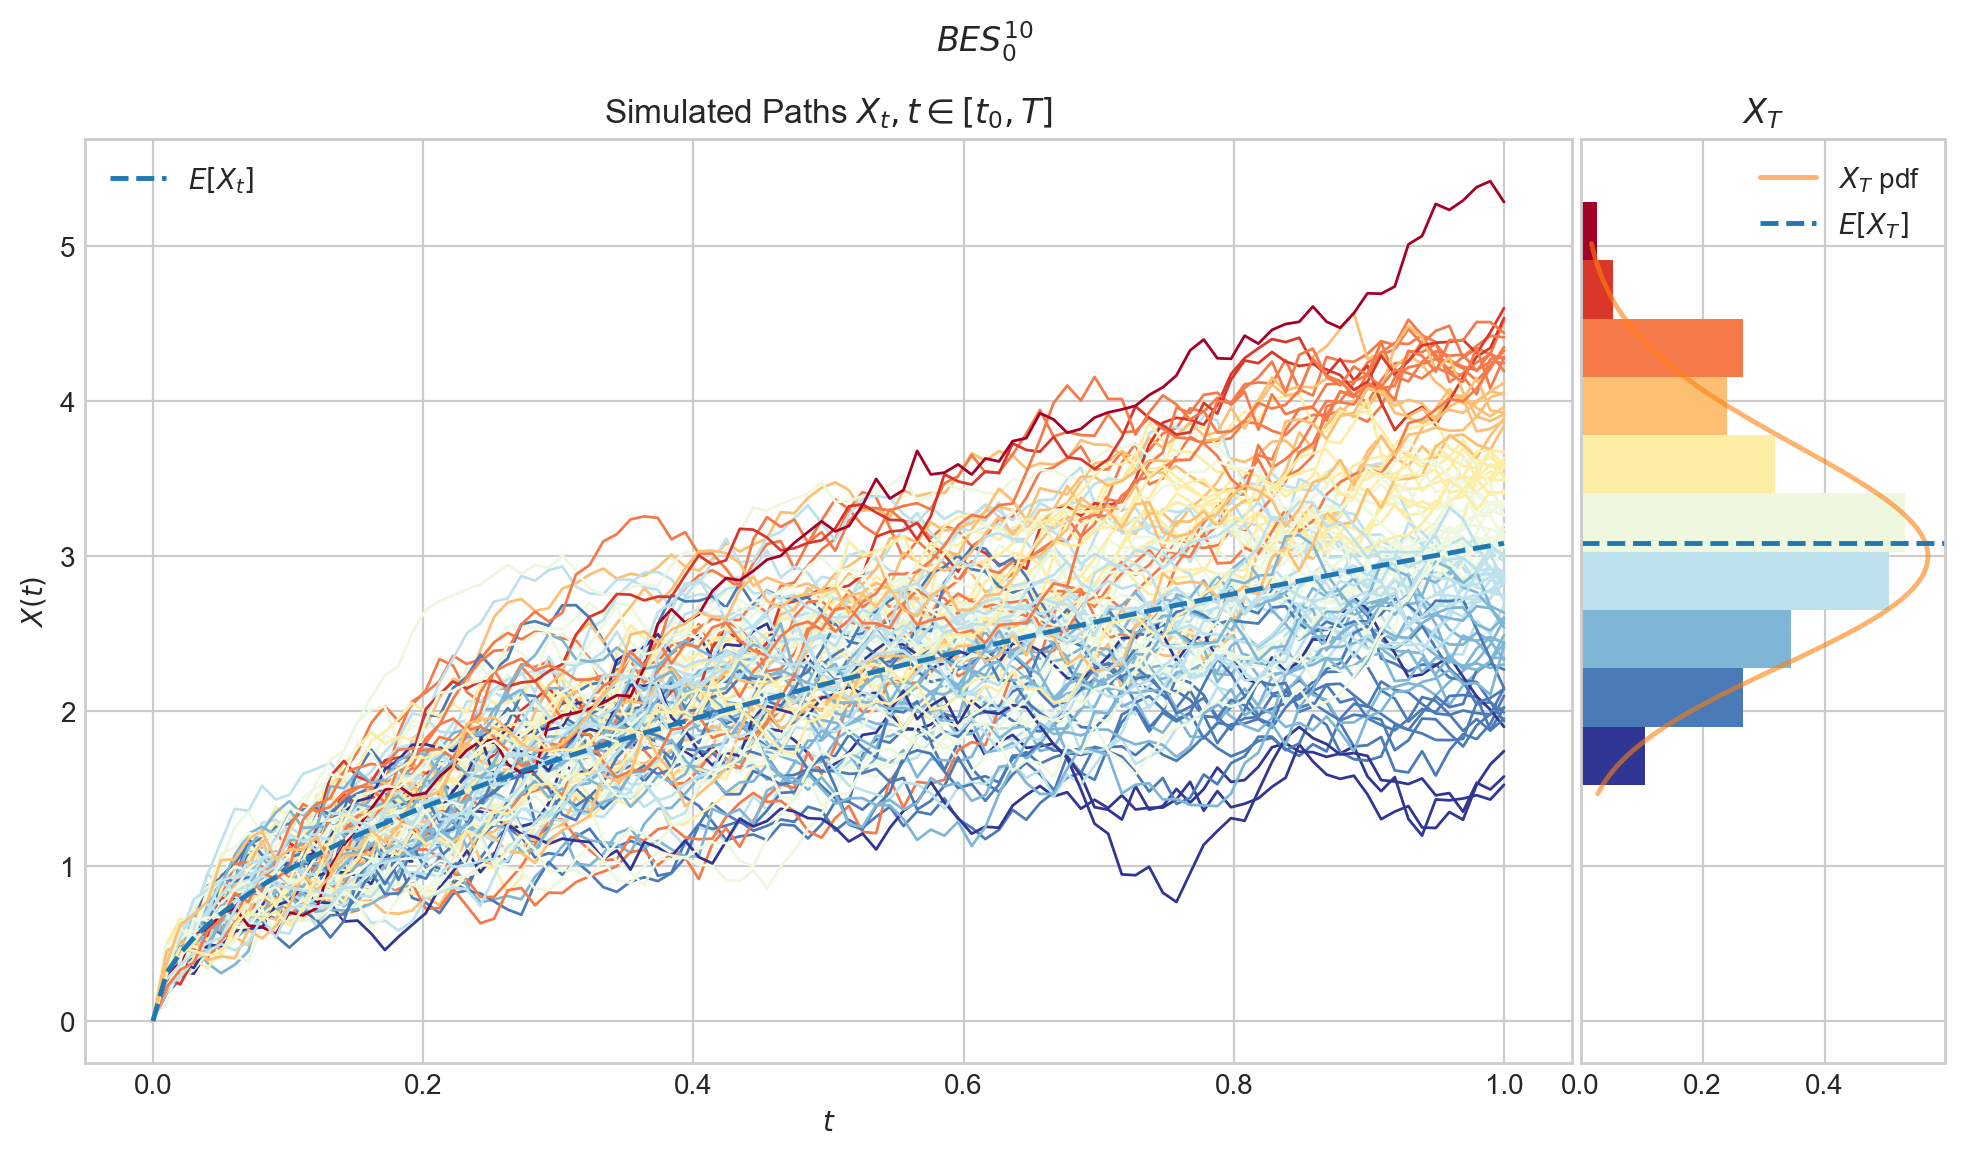

In [7]:
from aleatory.processes import BESProcess, BESQProcess
bes = BESProcess(dim=10)
bes.draw(n=100, N=100);

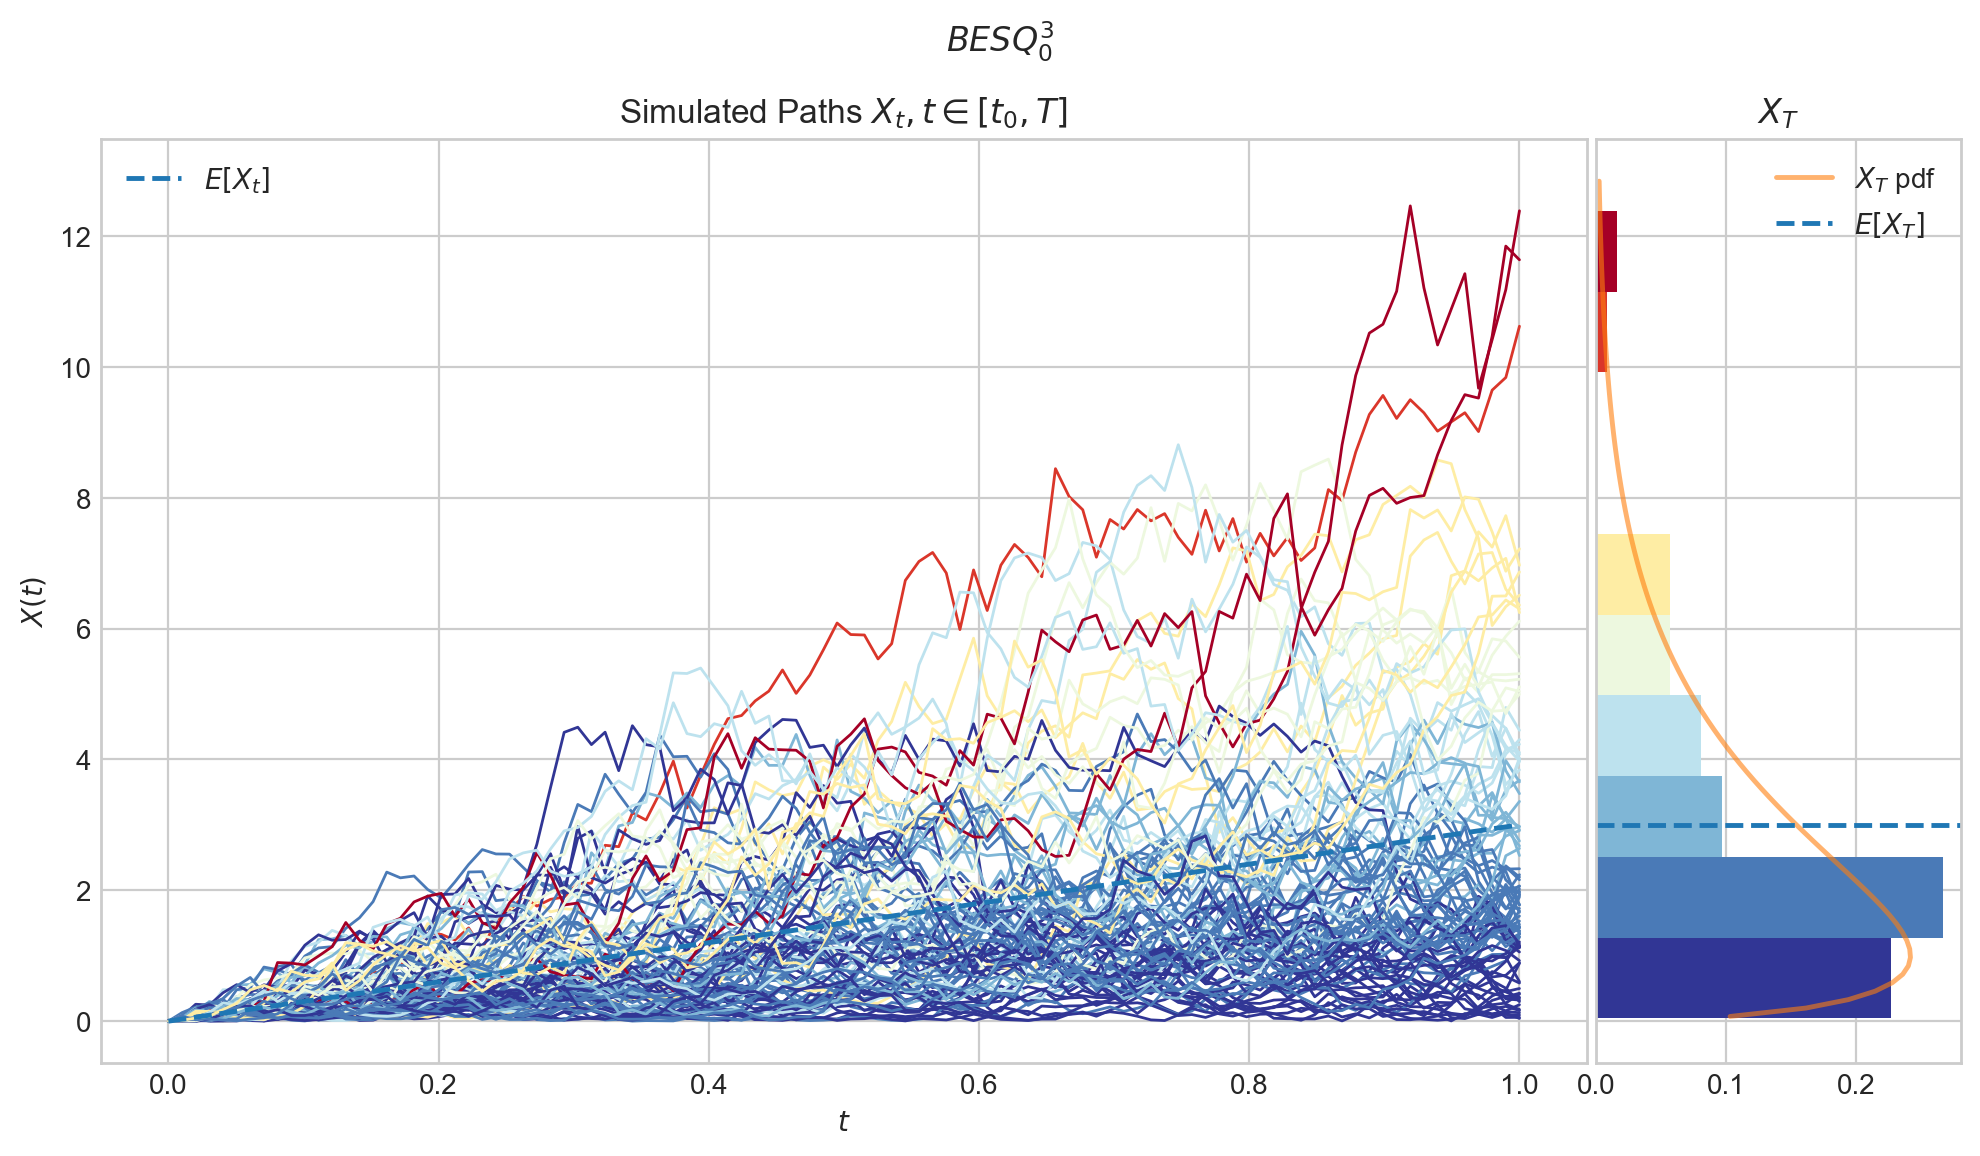

In [8]:
besq = BESQProcess(dim=3)
besq.draw(n=100, N=100);